<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex04_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import pandas as pd

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


가. 실습 1- 생성 데이터



1. 데이터 생성(Data Generating)

공지: 본 강의 예제 코드는 김성훈 교수님의 모두의 딥러닝 코드를 교수님의 허락하에 활용했음을 알려드립니다. 

In [2]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

2. 플레이스 홀더 생성(Placeholder Generating)

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape =[None,1])

3. 변수 생성(Variable Generating)

In [4]:
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

4. 가설 생성(Hypothesis Generaging)

In [5]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

5. 비용 함수 생성(Cost Functing Generating)

In [6]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1 - hypothesis))

6. 경사 하강법 적용(Applying Gradient Decent)

In [7]:
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

7.예측 값 및 정확도 측정(Prediction and Accuracy evaluation)

In [8]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

In [9]:
tf.cast?

In [10]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

In [12]:
tf.reduce_mean?
#https://webnautes.tistory.com/1235

8. 세션 실행(Session Excution)

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  for step in range(10001):
    cost_val, _ = sess.run([cost, train], feed_dict = {X: x_data, Y: y_data})
    if step % 200 == 0:
      print(step, cost_val)
      h, c, a = sess.run([hypothesis, predicted, accuracy],
                   feed_dict = {X: x_data, Y: y_data})
print("\n Hypothesis: ", h , "\n Correct(Y): ",c, "\n Accuracy: ", a)

나. 실습 2.- 데이터 셋 활용

1. 구글 드라이브 연동

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. 경로 지정

In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
%ls

3. 데이터 셋 불러오기

In [19]:
xy = np.loadtxt('data-03-diabetes.csv', delimiter = ',',dtype=np.float32)

In [23]:
xy[1:3]

array([[-0.882353 , -0.145729 ,  0.0819672, -0.414141 ,  0.       ,
        -0.207153 , -0.766866 , -0.666667 ,  1.       ],
       [-0.0588235,  0.839196 ,  0.0491803,  0.       ,  0.       ,
        -0.305514 , -0.492741 , -0.633333 ,  0.       ]], dtype=float32)

4. 독립변수와 종속변수 나누기

In [24]:
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

5. 플레이스 홀더 생성(Placehoder Generating)

In [25]:
X = tf.placeholder(tf.float32, shape = [None,8])
Y = tf.placeholder(tf.float32, shape = [None,1])

6. 변수 생성(Variable Generating)

In [26]:
W = tf.Variable(tf.random_normal([8,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

7. 가설 생성(Hypothesis Generating)

In [27]:
hypothesis = tf.sigmoid(tf.matmul(X,W) +b)

8. 비용 함수 생성(Cost Function Generating)

In [28]:
cost = -tf.reduce_mean(Y *tf.log(hypothesis) + (1- Y) *tf.log(1 -hypothesis))


9. 경사하강법 적용(Applying Gradient Decent)

In [29]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

9. 예측 값 및 정확도 측정

In [30]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

10. 세션실생(Session Excution)

In [31]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  feed = {X: x_data, Y:y_data}
  for step in range(10001):
    sess.run(train, feed_dict =feed)
    if step % 200 ==0:
      print(step, sess.run(cost, feed_dict = feed))
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict= feed)
  print("\nHypothesis: ", h, "\nCorrect(Y):", c, "\nAccuracy: ",a )

0 0.934746
200 0.8531153
400 0.80583286
600 0.76868856
800 0.7367268
1000 0.70873797
1200 0.684199
1400 0.66271037
1600 0.6439069
1800 0.62745017
2000 0.6130335
2200 0.6003832
2400 0.58925915
2600 0.5794524
2800 0.57078266
3000 0.5630951
3200 0.5562571
3400 0.5501559
3600 0.5446946
3800 0.5397905
4000 0.5353733
4200 0.53138214
4400 0.52776545
4600 0.52447844
4800 0.52148294
5000 0.51874566
5200 0.5162378
5400 0.5139345
5600 0.51181406
5800 0.50985736
6000 0.5080478
6200 0.50637096
6400 0.50481373
6600 0.5033651
6800 0.50201476
7000 0.5007538
7200 0.49957463
7400 0.49846977
7600 0.49743307
7800 0.49645892
8000 0.49554205
8200 0.49467817
8400 0.49386305
8600 0.49309278
8800 0.4923642
9000 0.4916742
9200 0.49102002
9400 0.4903989
9600 0.48980895
9800 0.48924768
10000 0.4887133

Hypothesis:  [[0.4592641 ]
 [0.9334061 ]
 [0.24568537]
 [0.9374099 ]
 [0.27533212]
 [0.7371248 ]
 [0.9440161 ]
 [0.64667535]
 [0.30138445]
 [0.45441037]
 [0.6449287 ]
 [0.19268262]
 [0.2449576 ]
 [0.48114726]
 [0.7

다. 파이썬 활용(Scikitlearn 활용)

In [34]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

1. Iris 데이터 셋 불러오기

In [33]:
X, y = load_iris(return_X_y=True)


2. 데이터 스케일링(Scaling), 정규화(regularization)

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

3. 로지스틱 함수 적용

In [37]:
clf = LogisticRegression(random_state=0).fit(X, y)

4. 정확도 측정

In [38]:
clf.score(X, y)

0.9733333333333334

In [40]:
LogisticRegression.score?

In [41]:
clf.predict(X[:2, :])


array([0, 0])

In [43]:
LogisticRegression.predict?

In [44]:
clf.predict_proba(X[:2, :])


array([[9.84694747e-01, 1.53051914e-02, 6.20245590e-08],
       [9.43491107e-01, 5.65085053e-02, 3.87861624e-07]])

In [45]:
LogisticRegression.predict_proba?

라. keras

1. 데이터 불러오기

In [70]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [71]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

In [72]:
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9   

2. 타입 생성

In [73]:
red['type'] = 0
white['type'] = 1

3. 데이터 프레임 병합

In [74]:
wine = pd.concat([red, white])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


4. 기술통계 추출

In [75]:
print(wine.describe())

       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75%         7.700000          0.400000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]


5. 시각화(Visualization)

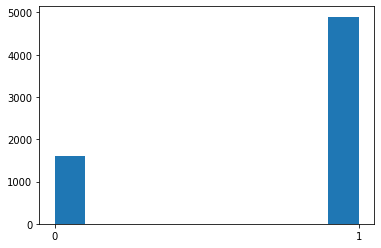

1    4898
0    1599
Name: type, dtype: int64


In [76]:
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0,1])
plt.show()
print(wine['type'].value_counts())

6. 정규화(Regularization)

In [78]:
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

7. 데이터 샘플링(Sampling)

In [79]:
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
99         0.181818          0.173333     0.397590  ...  0.115942  0.500000   1.0
1215       0.413223          0.126667     0.277108  ...  0.478261  0.500000   0.0
466        0.264463          0.040000     0.192771  ...  0.202899  0.500000   1.0
4505       0.214876          0.133333     0.138554  ...  0.318841  0.333333   1.0
3082       0.181818          0.180000     0.307229  ...  0.565217  0.500000   1.0

[5 rows x 13 columns]
[[0.18181818 0.17333333 0.39759036 0.23466258 0.06146179 0.08680556
  0.3640553  0.20802005 0.3255814  0.15730337 0.11594203 0.5
  1.        ]
 [0.41322314 0.12666667 0.27710843 0.02300613 0.14285714 0.06597222
  0.05299539 0.14979757 0.41860465 0.19101124 0.47826087 0.5
  0.        ]
 [0.26446281 0.04       0.19277108 0.12883436 0.04983389 0.18402778
  0.31105991 0.16367843 0.3875969  0.11797753 0.20289855 0.5
  1.        ]
 [0.21487603 0.13333333 0.13855422 0.08282209 0.06976744

8.테스트, 검증 데이터 셋 생성

In [80]:
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]

In [81]:
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

[0.18181818 0.17333333 0.39759036 0.23466258 0.06146179 0.08680556
 0.3640553  0.20802005 0.3255814  0.15730337 0.11594203 0.5       ]
1.0
[0.24793388 0.16       0.22289157 0.04294479 0.02325581 0.0625
 0.18663594 0.05957201 0.3255814  0.1741573  0.68115942 0.5       ]
1.0


9. 로지스틱 모델 생성(4개 레이어, 최종함수는 sigmoid)

In [83]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = 48, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units = 12, activation='relu'),
                             tf.keras.layers.Dense(units =2, activation='sigmoid')
                             
])

model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.07),
             loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


10. 모델 훈련

In [84]:
history = model.fit(train_X, train_Y, epochs = 25, batch_size = 32, validation_split = 0.25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 0s 86us/sample - loss: 0.1412 - acc: 0.9482 - val_loss: 0.0397 - val_acc: 0.9892
Epoch 2/25
3897/3897 [==============================] - 0s 46us/sample - loss: 0.0579 - acc: 0.9856 - val_loss: 0.1262 - val_acc: 0.9546
Epoch 3/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.0441 - acc: 0.9882 - val_loss: 0.0624 - val_acc: 0.9823
Epoch 4/25
3897/3897 [==============================] - 0s 50us/sample - loss: 0.0518 - acc: 0.9846 - val_loss: 0.0302 - val_acc: 0.9908
Epoch 5/25
3897/3897 [==============================] - 0s 53us/sample - loss: 0.0436 - acc: 0.9885 - val_loss: 0.0792 - val_acc: 0.9762
Epoch 6/25
3897/3897 [==============================] - 0s 51us/sample - loss: 0.0439 - acc: 0.9882 - val_loss: 0.0588 - val_acc: 0.9838
Epoch 7/25
3897/3897 [==============

11. 비용함수 시각화(loss Function Visualization)

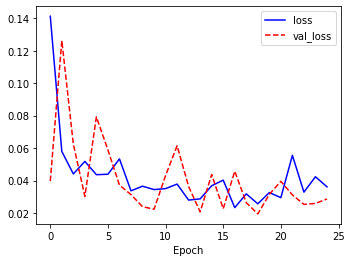

In [85]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

12. 정확도 시각화(Accuracy Visualization)

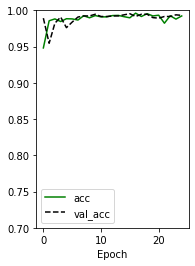

In [86]:
plt.subplot(1,2,2)
plt.plot(history.history['acc'], 'g-', label = 'acc')
plt.plot(history.history['val_acc'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()